In [6]:
import sys
!{sys.executable} -m pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [7]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


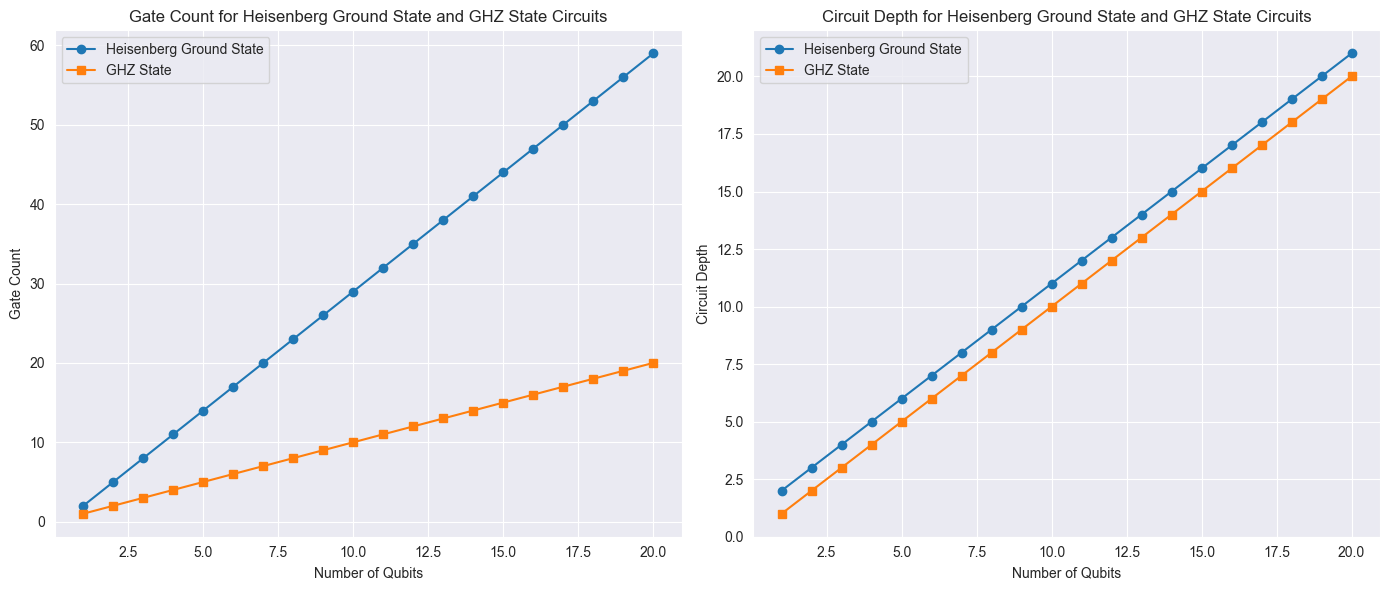

In [8]:
# Set the Seaborn style for the plot
sns.set_style("darkgrid")

# Set up the range of qubits to test
qubit_range = range(1, 21)
heisenberg_gate_counts = []
heisenberg_depths = []
ghz_gate_counts = []
ghz_depths = []

# Function to build the Heisenberg variational circuit and calculate gate count and depth
def heisenberg_ground_state_circuit(n_qubits):
    dev = qml.device("default.qubit", wires=n_qubits)
    
    # Define the Heisenberg variational circuit
    def variational_circuit(params):
        for i in range(n_qubits):
            qml.RX(params[i], wires=i)
        for i in range(n_qubits - 1):
            qml.CNOT(wires=[i, i + 1])
        for i in range(n_qubits):
            qml.RZ(params[i + n_qubits], wires=i)
    
    # Create a QNode to capture the tape
    params = np.random.rand(2 * n_qubits)
    @qml.qnode(dev)
    def heisenberg_qnode():
        variational_circuit(params)
        return qml.expval(qml.PauliZ(0))
    
    # Run the circuit to generate the tape, then count gates and calculate depth
    heisenberg_qnode()
    gate_count = len(heisenberg_qnode.qtape.operations)
    depth = heisenberg_qnode.qtape.graph.get_depth()
    return gate_count, depth

# Function to build the GHZ circuit and calculate gate count and depth
def ghz_state_circuit(n_qubits):
    dev = qml.device("default.qubit", wires=n_qubits)
    
    @qml.qnode(dev)
    def ghz_qnode():
        qml.Hadamard(wires=0)
        for i in range(n_qubits - 1):
            qml.CNOT(wires=[i, i + 1])
        return qml.expval(qml.PauliZ(0))
    
    # Run the circuit to generate the tape, then count gates and calculate depth
    ghz_qnode()
    gate_count = len(ghz_qnode.qtape.operations)
    depth = ghz_qnode.qtape.graph.get_depth()
    return gate_count, depth

# Collect gate count and depth data for each qubit count
for n_qubits in qubit_range:
    h_count, h_depth = heisenberg_ground_state_circuit(n_qubits)
    heisenberg_gate_counts.append(h_count)
    heisenberg_depths.append(h_depth)

    ghz_count, ghz_depth = ghz_state_circuit(n_qubits)
    ghz_gate_counts.append(ghz_count)
    ghz_depths.append(ghz_depth)

# Plotting the gate counts and circuit depths as functions of the number of qubits
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot gate counts
axs[0].plot(qubit_range, heisenberg_gate_counts, label="Heisenberg Ground State", marker='o')
axs[0].plot(qubit_range, ghz_gate_counts, label="GHZ State", marker='s')
axs[0].set_xlabel("Number of Qubits")
axs[0].set_ylabel("Gate Count")
axs[0].set_title("Gate Count for Heisenberg Ground State and GHZ State Circuits")
axs[0].legend()

# Plot circuit depths
axs[1].plot(qubit_range, heisenberg_depths, label="Heisenberg Ground State", marker='o')
axs[1].plot(qubit_range, ghz_depths, label="GHZ State", marker='s')
axs[1].set_xlabel("Number of Qubits")
axs[1].set_ylabel("Circuit Depth")
axs[1].set_title("Circuit Depth for Heisenberg Ground State and GHZ State Circuits")
axs[1].legend()

plt.tight_layout()
plt.show()

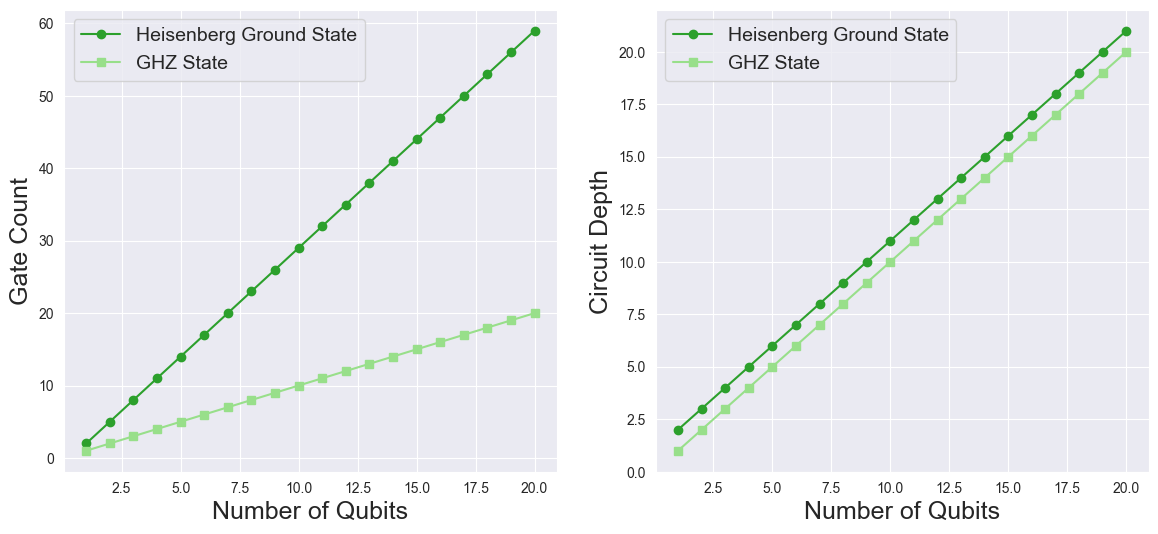

In [10]:
# Plotting the gate counts and circuit depths as functions of the number of qubits
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Set the color palette to shades of green
heisenberg_color = "#2ca02c"  # Darker green
ghz_color = "#98df8a"  # Lighter green

# Plot gate counts
axs[0].plot(qubit_range, heisenberg_gate_counts, label="Heisenberg Ground State", marker='o', color=heisenberg_color)
axs[0].plot(qubit_range, ghz_gate_counts, label="GHZ State", marker='s', color=ghz_color)
axs[0].set_xlabel("Number of Qubits", fontsize=18)
axs[0].set_ylabel("Gate Count", fontsize=18)
#axs[0].set_title("Gate Count for Heisenberg Ground State and GHZ State Circuits")
axs[0].legend(fontsize=14)

# Plot circuit depths
axs[1].plot(qubit_range, heisenberg_depths, label="Heisenberg Ground State", marker='o', color=heisenberg_color)
axs[1].plot(qubit_range, ghz_depths, label="GHZ State", marker='s', color=ghz_color)
axs[1].set_xlabel("Number of Qubits", fontsize=18)
axs[1].set_ylabel("Circuit Depth", fontsize=18)
#axs[1].set_title("Circuit Depth for Heisenberg Ground State and GHZ State Circuits")
axs[1].legend(fontsize=14)

#plt.tight_layout(fontsize=14)
plt.show()

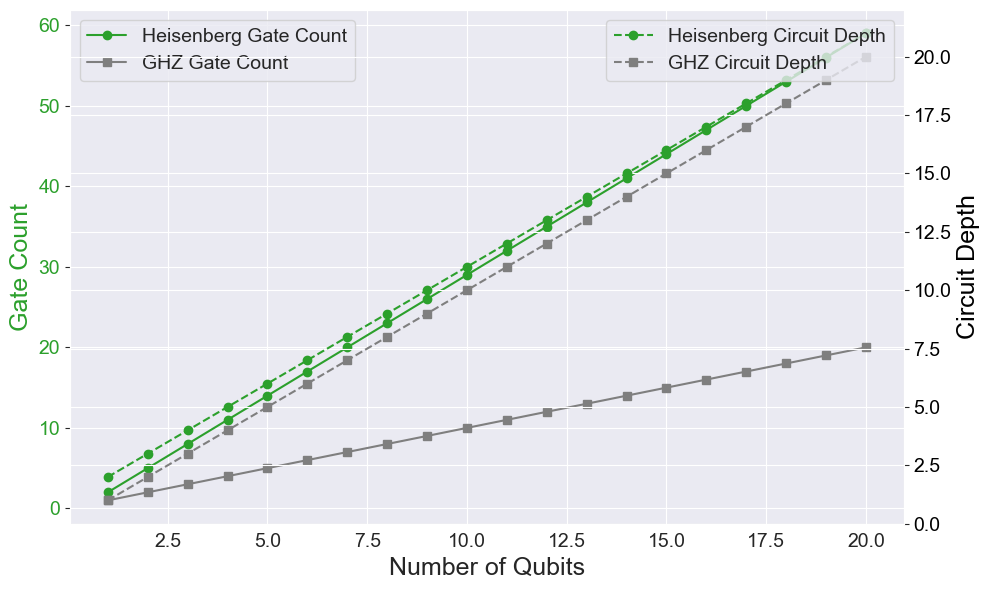

In [11]:
import matplotlib.pyplot as plt

# Define colors for each data set
heisenberg_color = "#2ca02c"  # Green for Heisenberg
ghz_color = "#7f7f7f"         # Gray for GHZ

# Create the figure and a single set of axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot gate counts on the primary y-axis
ax1.plot(qubit_range, heisenberg_gate_counts, label="Heisenberg Gate Count", marker='o', color=heisenberg_color, linestyle='-')
ax1.plot(qubit_range, ghz_gate_counts, label="GHZ Gate Count", marker='s', color=ghz_color, linestyle='-')
ax1.set_xlabel("Number of Qubits", fontsize=18)
ax1.set_ylabel("Gate Count", fontsize=18, color=heisenberg_color)
ax1.tick_params(axis='y', labelcolor=heisenberg_color, labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.legend(loc="upper left", fontsize=14)

# Create a secondary y-axis for the circuit depths
ax2 = ax1.twinx()
ax2.plot(qubit_range, heisenberg_depths, label="Heisenberg Circuit Depth", marker='o', color=heisenberg_color, linestyle='--')
ax2.plot(qubit_range, ghz_depths, label="GHZ Circuit Depth", marker='s', color=ghz_color, linestyle='--')
ax2.set_ylabel("Circuit Depth", fontsize=18, color="black")
ax2.tick_params(axis='y', labelcolor="black", labelsize=14)
ax2.legend(loc="upper right", fontsize=14)

# Set the title for the combined plot
#plt.title("Gate Counts and Circuit Depths for Heisenberg and GHZ State Circuits", fontsize=20)

# Adjust layout for clarity
fig.tight_layout()
plt.show()


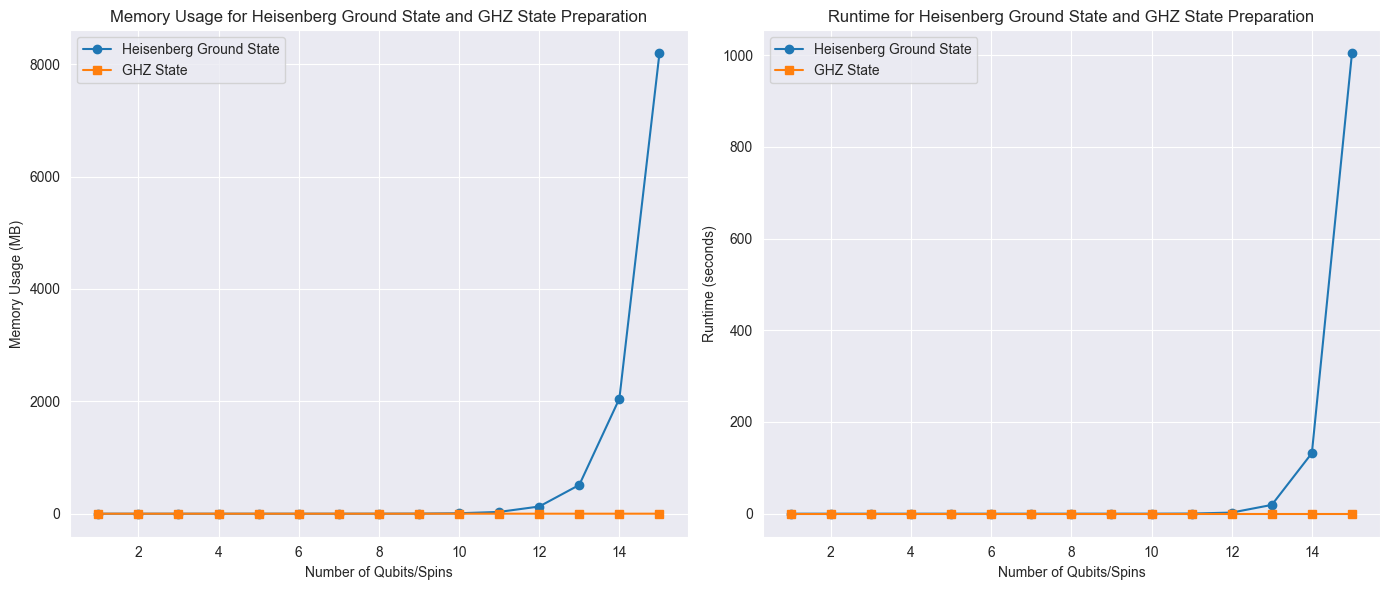

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
from scipy.linalg import eigh  # For exact diagonalization

# Define the range of qubits/spins
qubit_range = range(1, 16)  # Limiting to 15 for practicality in classical simulation
heisenberg_memory_usage = []
heisenberg_runtime = []
ghz_memory_usage = []
ghz_runtime = []

# Function to generate the Heisenberg Hamiltonian matrix for a given number of spins
def heisenberg_hamiltonian(n):
    dim = 2 ** n
    H = np.zeros((dim, dim), dtype=np.float64)

    for i in range(n - 1):
        for j in range(dim):
            # Get binary representation of state |j>
            binary_state = np.binary_repr(j, width=n)
            state = np.array(list(map(int, binary_state)))

            # Calculate XX term
            flip = np.copy(state)
            flip[i] ^= 1  # Flip spin at position i
            flip[i + 1] ^= 1  # Flip spin at position i+1
            flip_index = int("".join(map(str, flip)), 2)
            H[j, flip_index] -= 1

            # Calculate YY and ZZ terms
            if state[i] == state[i + 1]:
                H[j, j] += 1
            else:
                H[j, j] -= 1

    return H

# Collect complexity metrics for Heisenberg ground state
for n in qubit_range:
    # Memory usage estimation (number of elements * size of each float element in bytes)
    dim = 2 ** n
    memory_usage = (dim ** 2) * 8 / (1024 ** 2)  # Convert bytes to MB
    heisenberg_memory_usage.append(memory_usage)

    # Measure runtime for exact diagonalization
    H = heisenberg_hamiltonian(n)
    start_time = time.time()
    _ = eigh(H, eigvals=(0, 0))  # Only compute the ground state eigenvalue
    heisenberg_runtime.append(time.time() - start_time)

# Collect complexity metrics for GHZ state preparation
for n in qubit_range:
    # Memory usage estimation for GHZ state (storing 2^n amplitudes for each state component)
    memory_usage = (2 ** n) * 8 / (1024 ** 2)  # Convert bytes to MB
    ghz_memory_usage.append(memory_usage)

    # Measure runtime for GHZ state preparation (time to allocate and initialize the state vector)
    start_time = time.time()
    ghz_state = np.zeros(2 ** n, dtype=np.complex128)
    ghz_state[0] = 1 / np.sqrt(2)
    ghz_state[-1] = 1 / np.sqrt(2)  # Represents |0...0> + |1...1>
    ghz_runtime.append(time.time() - start_time)

# Plotting memory usage and runtime as functions of qubit count
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot memory usage
axs[0].plot(qubit_range, heisenberg_memory_usage, label="Heisenberg Ground State", marker='o')
axs[0].plot(qubit_range, ghz_memory_usage, label="GHZ State", marker='s')
axs[0].set_xlabel("Number of Qubits/Spins")
axs[0].set_ylabel("Memory Usage (MB)")
axs[0].set_title("Memory Usage for Heisenberg Ground State and GHZ State Preparation")
axs[0].legend()

# Plot runtime
axs[1].plot(qubit_range, heisenberg_runtime, label="Heisenberg Ground State", marker='o')
axs[1].plot(qubit_range, ghz_runtime, label="GHZ State", marker='s')
axs[1].set_xlabel("Number of Qubits/Spins")
axs[1].set_ylabel("Runtime (seconds)")
axs[1].set_title("Runtime for Heisenberg Ground State and GHZ State Preparation")
axs[1].legend()

plt.tight_layout()
plt.show()

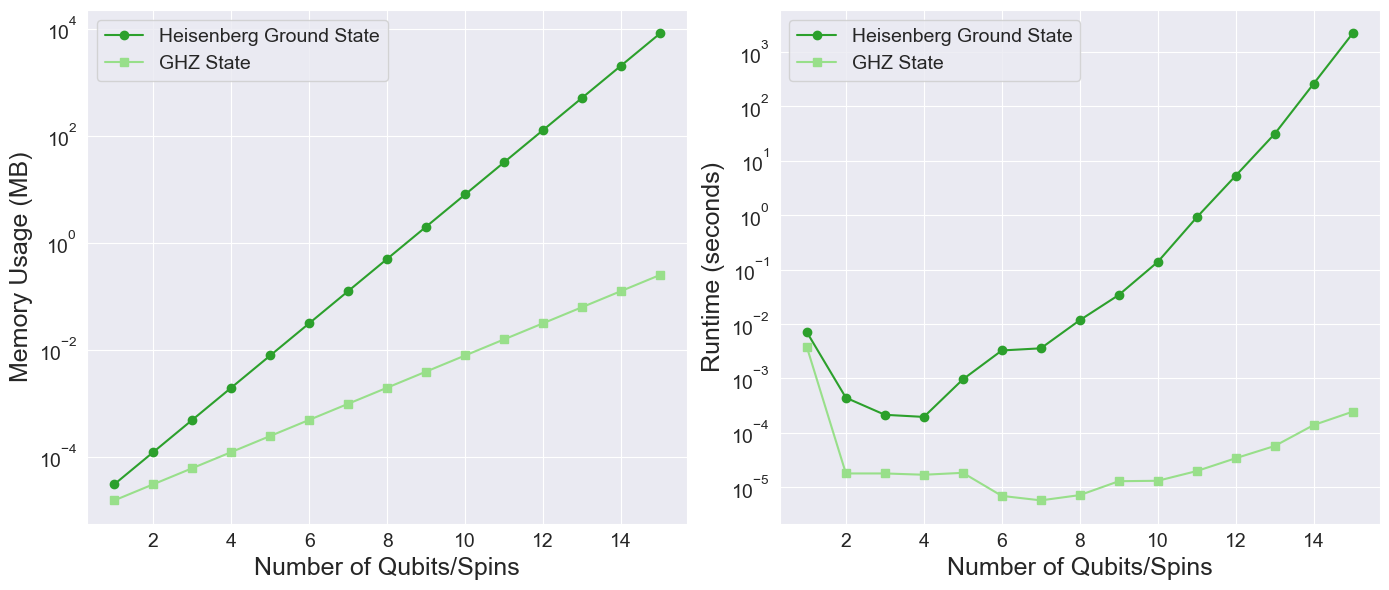

In [26]:
import matplotlib.pyplot as plt

# Set the color palette to shades of green
heisenberg_color = "#2ca02c"  # Darker green
ghz_color = "#98df8a"  # Lighter green

# Plotting memory usage and runtime as functions of qubit count
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot memory usage
axs[0].plot(qubit_range, heisenberg_memory_usage, label="Heisenberg Ground State", marker='o', color=heisenberg_color)
axs[0].plot(qubit_range, ghz_memory_usage, label="GHZ State", marker='s', color=ghz_color)
axs[0].set_xlabel("Number of Qubits/Spins", fontsize=18)
axs[0].set_ylabel("Memory Usage (MB)", fontsize=18)
#axs[0].set_title("Memory Usage for Heisenberg Ground State and GHZ State Preparation", fontsize=20)
axs[0].set_yscale("log")
axs[0].tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size
axs[0].legend(fontsize=14)  # Increase legend font size

# Plot runtime
axs[1].plot(qubit_range, heisenberg_runtime, label="Heisenberg Ground State", marker='o', color=heisenberg_color)
axs[1].plot(qubit_range, ghz_runtime, label="GHZ State", marker='s', color=ghz_color)
axs[1].set_xlabel("Number of Qubits/Spins", fontsize=18)
axs[1].set_ylabel("Runtime (seconds)", fontsize=18)
#axs[1].set_title("Runtime for Heisenberg Ground State and GHZ State Preparation", fontsize=20)
axs[1].set_yscale("log")
axs[1].tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size
axs[1].legend(fontsize=14)  # Increase legend font size

plt.tight_layout()
plt.show()


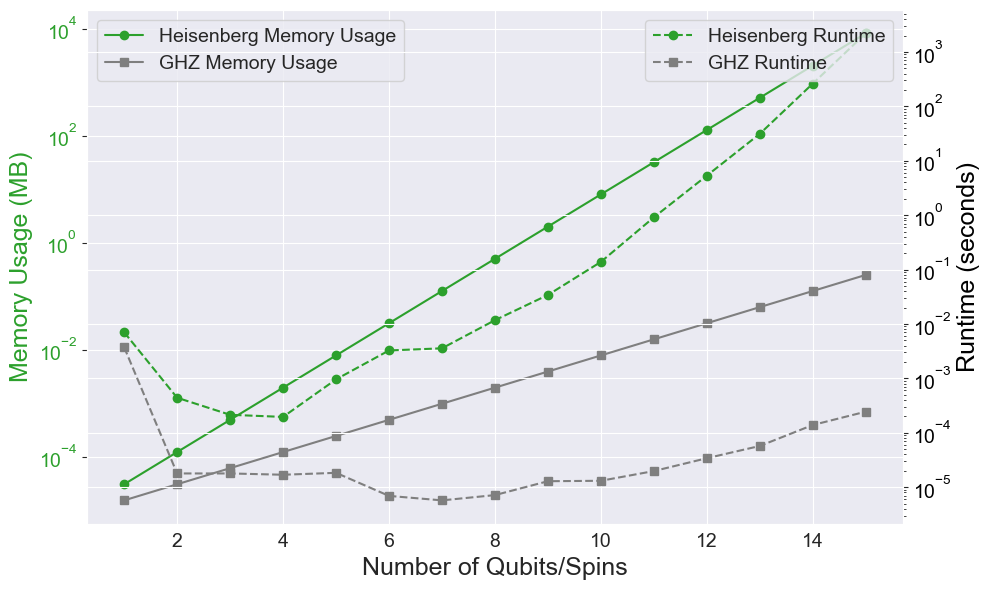

In [30]:
import matplotlib.pyplot as plt

# Define colors for each data set
heisenberg_color = "#2ca02c"  # Green
ghz_color = "#7f7f7f"         # Gray

# Create the figure and a single set of axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot memory usage on the primary y-axis
ax1.plot(qubit_range, heisenberg_memory_usage, label="Heisenberg Memory Usage", marker='o', color=heisenberg_color, linestyle='-')
ax1.plot(qubit_range, ghz_memory_usage, label="GHZ Memory Usage", marker='s', color=ghz_color, linestyle='-')
ax1.set_xlabel("Number of Qubits/Spins", fontsize=18)
ax1.set_ylabel("Memory Usage (MB)", fontsize=18, color=heisenberg_color)
ax1.set_yscale("log")
ax1.tick_params(axis='y', labelcolor=heisenberg_color, labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.legend(loc="upper left", fontsize=14)

# Create a secondary y-axis for the runtime
ax2 = ax1.twinx()
ax2.plot(qubit_range, heisenberg_runtime, label="Heisenberg Runtime", marker='o', color=heisenberg_color, linestyle='--')
ax2.plot(qubit_range, ghz_runtime, label="GHZ Runtime", marker='s', color=ghz_color, linestyle='--')
ax2.set_ylabel("Runtime (seconds)", fontsize=18, color="black")
ax2.set_yscale("log")
ax2.tick_params(axis='y', labelcolor="black", labelsize=14)
ax2.legend(loc="upper right", fontsize=14)

# Set the title for the combined plot
#plt.title("Memory Usage and Runtime for Heisenberg Ground State and GHZ State Preparation", fontsize=20)

# Adjust layout for clarity
fig.tight_layout()
plt.show()


Spins: 2, Memory Usage: 0.47 MB, Runtime: 0.00 seconds
Spins: 3, Memory Usage: 0.04 MB, Runtime: 0.00 seconds
Spins: 4, Memory Usage: 0.08 MB, Runtime: 0.00 seconds
Spins: 5, Memory Usage: 0.22 MB, Runtime: 0.00 seconds
Spins: 6, Memory Usage: 1.25 MB, Runtime: 0.00 seconds
Spins: 7, Memory Usage: 6.05 MB, Runtime: 0.01 seconds
Spins: 8, Memory Usage: 12.27 MB, Runtime: 0.03 seconds
Spins: 9, Memory Usage: 79.68 MB, Runtime: 0.15 seconds
Spins: 10, Memory Usage: 156.62 MB, Runtime: 0.53 seconds
Spins: 11, Memory Usage: 613.61 MB, Runtime: 3.41 seconds
Spins: 12, Memory Usage: 1421.32 MB, Runtime: 17.72 seconds
Spins: 13, Memory Usage: 2389.08 MB, Runtime: 129.70 seconds
Spins: 14, Memory Usage: 6760.80 MB, Runtime: 890.07 seconds


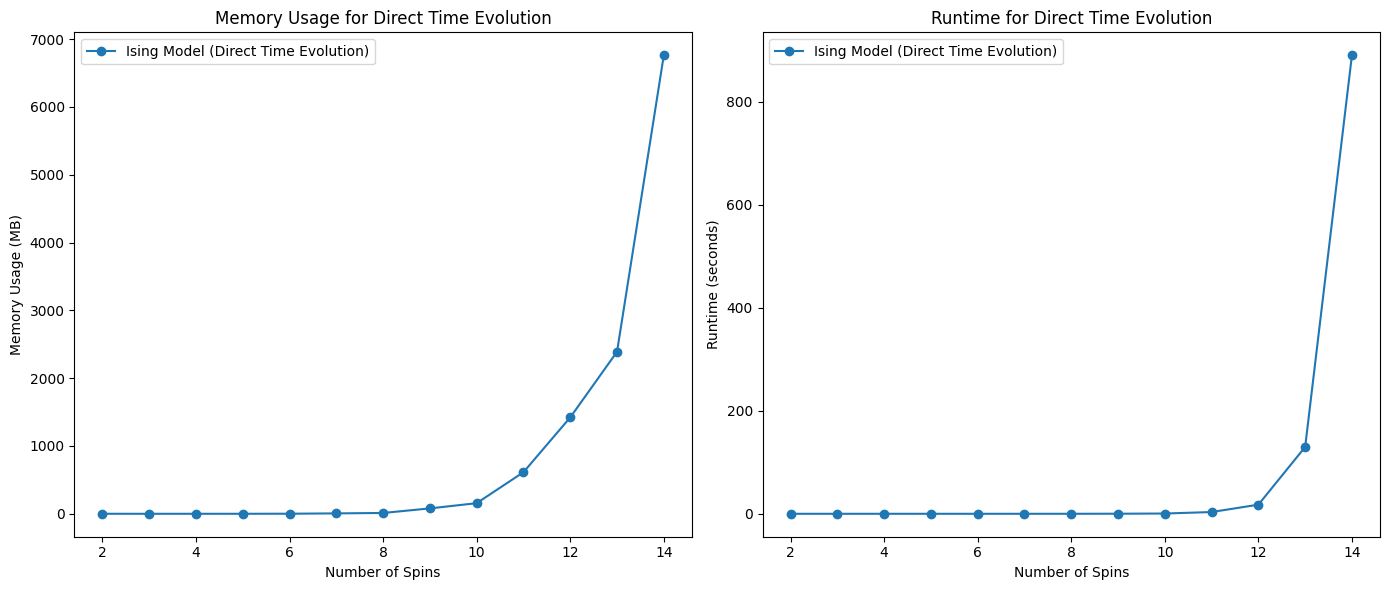

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil
from scipy.linalg import expm

# Parameters for the Ising model
J = 1.0  # Interaction strength
h = 1.0  # Magnetic field strength
t_total = 1.0  # Total evolution time

# Range of spins to simulate
spin_range = range(2, 15, 1)  # From 2 to 20 spins in steps of 2
ising_memory_usage = []
ising_runtime = []

# Function to estimate memory usage (in MB) for the current process
def get_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 ** 2)  # Convert bytes to MB

# Construct the Ising Hamiltonian for given number of spins
def ising_hamiltonian(n_spins):
    dim = 2 ** n_spins
    H = np.zeros((dim, dim), dtype=np.complex128)
    
    # Define the Z-Z interaction
    for i in range(n_spins - 1):
        for j in range(dim):
            binary_state = np.binary_repr(j, width=n_spins)
            state = np.array(list(map(int, binary_state)))
            if state[i] == state[i + 1]:  # If spins are aligned
                H[j, j] -= J
            else:
                H[j, j] += J

    # Define the X interaction
    for i in range(n_spins):
        for j in range(dim):
            binary_state = np.binary_repr(j, width=n_spins)
            state = np.array(list(map(int, binary_state)))
            flip = np.copy(state)
            flip[i] ^= 1  # Flip spin at position i
            flip_index = int("".join(map(str, flip)), 2)
            H[j, flip_index] -= h

    return H

# Perform direct time evolution
for n_spins in spin_range:
    # Construct the full Hamiltonian
    H = ising_hamiltonian(n_spins)
    
    # Track memory usage before time evolution
    initial_memory = get_memory_usage()
    
    # Track runtime for full matrix exponentiation
    start_time = time.time()
    
    # Calculate the time-evolution operator
    U = expm(-1j * H * t_total)
    
    # Initialize the state vector (ground state approximation)
    psi = np.zeros(2 ** n_spins, dtype=np.complex128)
    psi[0] = 1.0  # Initialize in |0...0> state
    
    # Apply the time-evolution operator
    psi = U @ psi
    
    runtime = time.time() - start_time  # Calculate runtime
    
    # Track memory usage after time evolution
    final_memory = get_memory_usage()
    memory_usage = final_memory - initial_memory  # Memory used for time evolution in MB
    
    # Append metrics
    ising_memory_usage.append(memory_usage)
    ising_runtime.append(runtime)
    
    print(f"Spins: {n_spins}, Memory Usage: {memory_usage:.2f} MB, Runtime: {runtime:.2f} seconds")

# Plotting the memory usage and runtime as functions of the number of spins
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot memory usage
axs[0].plot(spin_range, ising_memory_usage, label="Ising Model (Direct Time Evolution)", marker='o')
axs[0].set_xlabel("Number of Spins")
axs[0].set_ylabel("Memory Usage (MB)")
axs[0].set_title("Memory Usage for Direct Time Evolution")
axs[0].legend()

# Plot runtime
axs[1].plot(spin_range, ising_runtime, label="Ising Model (Direct Time Evolution)", marker='o')
axs[1].set_xlabel("Number of Spins")
axs[1].set_ylabel("Runtime (seconds)")
axs[1].set_title("Runtime for Direct Time Evolution")
axs[1].legend()

plt.tight_layout()
plt.show()


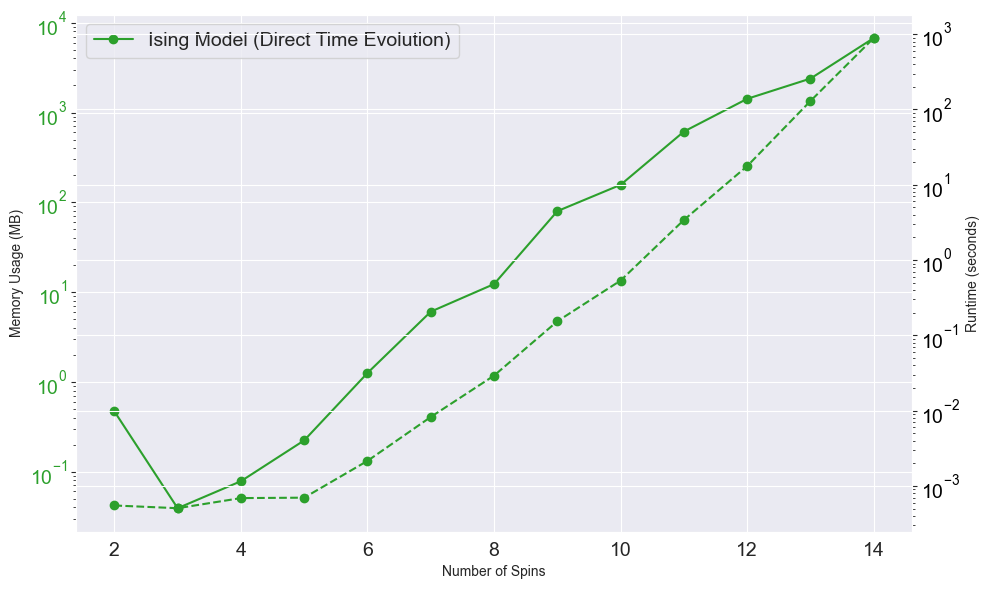

In [16]:
# Plot runtime
axs[1].plot(spin_range, ising_runtime, label="Ising Model (Direct Time Evolution)", marker='o')
axs[1].set_xlabel("Number of Spins")
axs[1].set_ylabel("Runtime (seconds)")
axs[1].set_title("Runtime for Direct Time Evolution")
axs[1].legend()


# Define colors for each data set
heisenberg_color = "#2ca02c"  # Green
ghz_color = "#7f7f7f"         # Gray

# Create the figure and a single set of axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot memory usage on the primary y-axis
ax1.plot(spin_range, ising_memory_usage, label="Ising Model (Direct Time Evolution)", marker='o', color=heisenberg_color)
ax1.set_xlabel("Number of Spins")
ax1.set_ylabel("Memory Usage (MB)")
#ax1.set_title("Memory Usage for Direct Time Evolution")
ax1.set_yscale("log")
ax1.tick_params(axis='y', labelcolor=heisenberg_color, labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.legend(loc="upper left", fontsize=14)

# Create a secondary y-axis for the runtime
ax2 = ax1.twinx()
ax2.plot(spin_range, ising_runtime, label="Ising Model (Direct Time Evolution)", marker='o',color=heisenberg_color, linestyle='--')
ax2.set_xlabel("Number of Spins")
ax2.set_ylabel("Runtime (seconds)")
#ax2.set_title("Runtime for Direct Time Evolution")
ax2.set_yscale("log")
ax2.tick_params(axis='y', labelcolor="black", labelsize=14)
#ax2.legend(loc="upper right", fontsize=14)

# Set the title for the combined plot
#plt.title("Memory Usage and Runtime for Heisenberg Ground State and GHZ State Preparation", fontsize=20)

# Adjust layout for clarity
fig.tight_layout()
plt.show()

In [17]:
ising_memory_usage

[0.46875,
 0.0390625,
 0.078125,
 0.22265625,
 1.25390625,
 6.046875,
 12.26953125,
 79.6796875,
 156.625,
 613.609375,
 1421.31640625,
 2389.08203125,
 6760.796875]

In [18]:
ising_runtime

[0.0005497932434082031,
 0.0005056858062744141,
 0.0006890296936035156,
 0.000698089599609375,
 0.002151012420654297,
 0.008239984512329102,
 0.02919483184814453,
 0.15372300148010254,
 0.534904956817627,
 3.4103429317474365,
 17.722211837768555,
 129.7038049697876,
 890.065810918808]

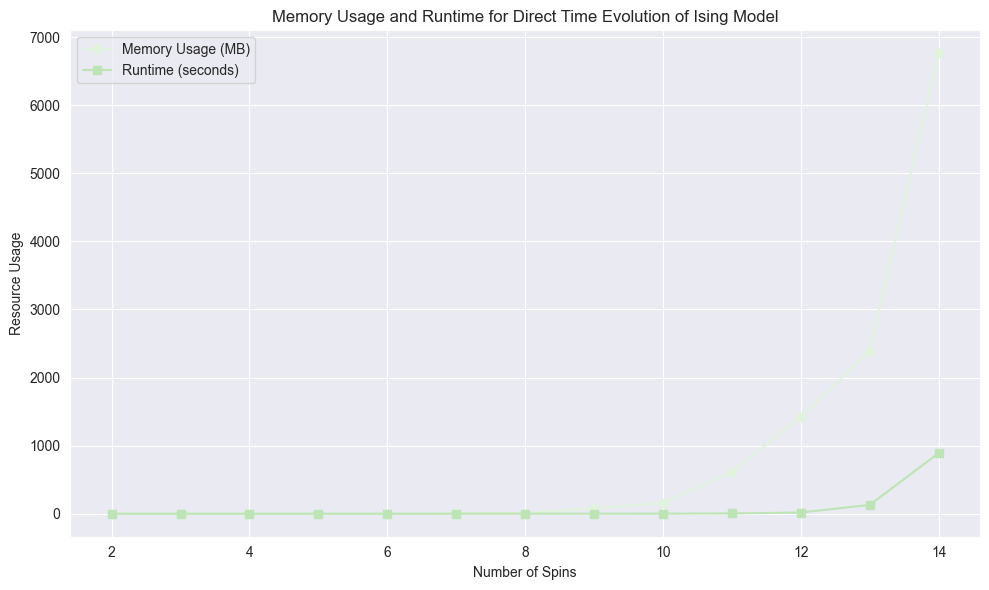

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and green color palette
sns.set_style("darkgrid")
sns.set_palette("Greens")

# Create a single plot for both memory usage and runtime
plt.figure(figsize=(10, 6))

# Plot memory usage
plt.plot(spin_range, ising_memory_usage, label="Memory Usage (MB)", marker='o')

# Plot runtime
plt.plot(spin_range, ising_runtime, label="Runtime (seconds)", marker='s')

# Labels and title
plt.xlabel("Number of Spins")
plt.ylabel("Resource Usage")
plt.title("Memory Usage and Runtime for Direct Time Evolution of Ising Model")
plt.legend()

plt.tight_layout()
plt.show()
